#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 

# Student name:

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


## **Part 1: Linear Regression:**  **(25 marks)**


##### 1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn import metrics

In [360]:
df = pd.read_csv('weather_dataset.csv')
df['recording_date_time'] = pd.to_datetime(df['recording_date_time'])

train = df[df['recording_date_time'] < '2015-01-01'].copy()
test = df[df['recording_date_time'] >= '2015-01-01'].copy()

In [361]:
train.drop('recording_date_time', axis=1, inplace=True)
test.drop('recording_date_time', axis=1, inplace=True)

In [333]:
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (78910, 9)
Test Shape:  (17543, 9)


In [260]:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['temperature', 'apparent_temperature', 'humidity', 'wind_speed',
       'wind_bearing', 'visibility', 'cloud_cover', 'pressure'],
      dtype='object')


In [261]:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['precip_type'], dtype='object')


##### 2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [334]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
temperature,1,0.99,-0.63,0.009,0.03,0.39,nan,-0.0054
apparent_temperature,0.99,1,-0.6,-0.057,0.029,0.38,nan,-0.00022
humidity,-0.63,-0.6,1,-0.22,0.00073,-0.37,nan,0.0055
wind_speed,0.009,-0.057,-0.22,1,0.1,0.1,nan,-0.049
wind_bearing,0.03,0.029,0.00073,0.1,1,0.048,nan,-0.012
visibility,0.39,0.38,-0.37,0.1,0.048,1,nan,0.06
cloud_cover,nan,nan,nan,nan,nan,nan,nan,nan
pressure,-0.0054,-0.00022,0.0055,-0.049,-0.012,0.06,nan,1


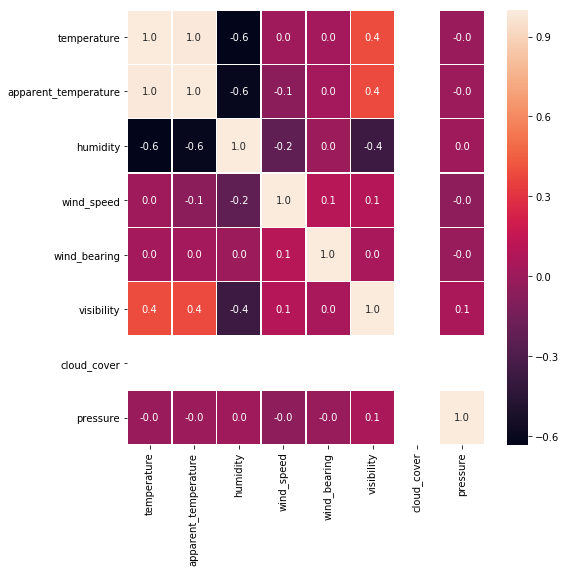

In [347]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Explaination

We can see from the feature correlation correlation figure above that **wind speed, wind_bearing and pressure** don't have any correlation with Temperature. Therefore, we are chooring to drop these features from the dataset. Additionally, the **cloud cover** feature apparantly has all values 0 so we will eliminate this feature from the dataset as well. The **Precip Type** is a Categorical feature so unless we Encode that feature, we can't use it in the linear regression model.

***The remaining features that we will use for the prediction of Temperature are Apparent Temperature, Humidity and Visibility***

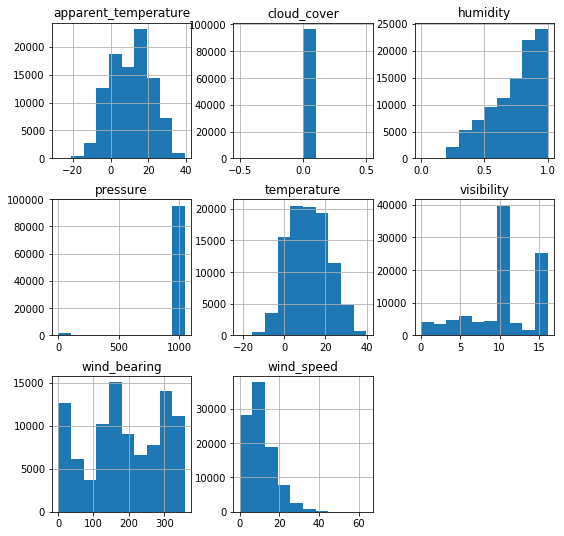

In [266]:
rcParams['figure.figsize'] = 9, 9
# plt.figure(figsize=(10,10))
fig = df[quantitative].hist()
# plt.show(fig)

In [75]:
df = df.drop('cloud_cover', axis=1)

In [79]:
df.isna().sum()

recording_date_time     0
precip_type             0
temperature             0
apparent_temperature    0
humidity                0
wind_speed              0
wind_bearing            0
visibility              0
pressure                0
dtype: int64

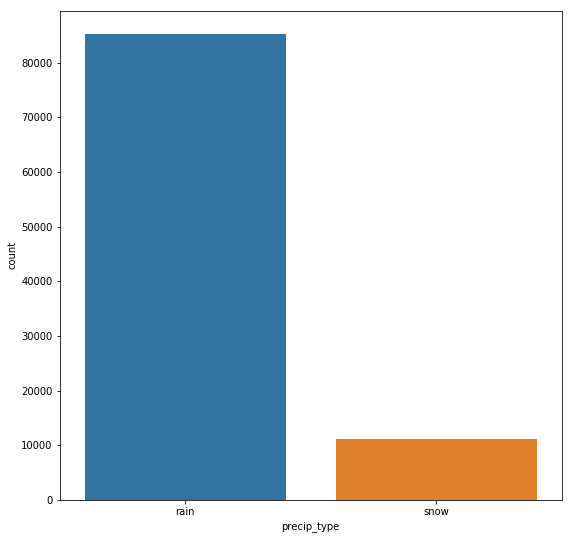

In [267]:
sns.countplot(x=df['precip_type'])

<Figure size 1296x576 with 0 Axes>

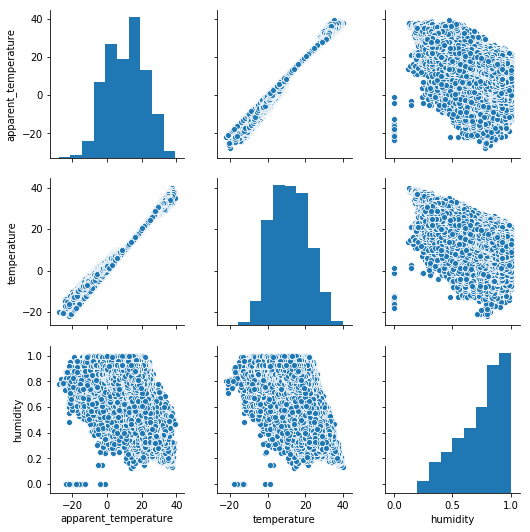

In [268]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(df[['apparent_temperature','temperature', 'humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

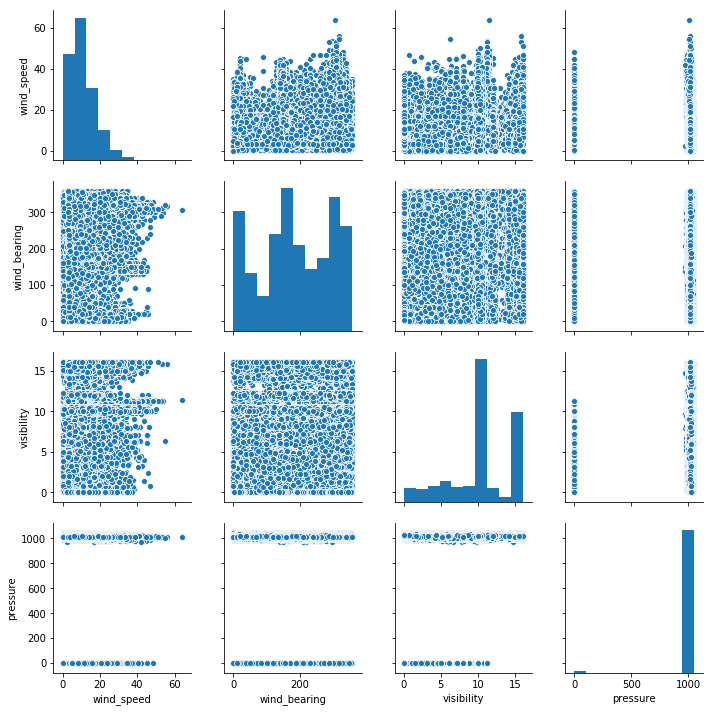

In [269]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(df[['wind_speed', 'wind_bearing', 'visibility', 'pressure']])
plt.show()

##### 3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [285]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [286]:
train.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [288]:
train = pd.get_dummies(train, columns=["precip_type"], prefix=["precip_type_"])
test = pd.get_dummies(test, columns=["precip_type"], prefix=["precip_type_"])

In [353]:
train.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [422]:
X_train, y_train = train.drop(['wind_speed', 'wind_bearing', 'cloud_cover','pressure', 'temperature'], axis=1), train[['temperature']]
X_test, y_test = test.drop(['wind_speed', 'wind_bearing', 'cloud_cover','pressure', 'temperature'], axis=1), test[['temperature']]


In [405]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [423]:
X_train.head()

,apparent_temperature,humidity,visibility,precip_type_rain,precip_type_snow
0,7.39,0.89,15.83,1,0
1,7.23,0.86,15.83,1,0
2,9.38,0.89,14.96,1,0
3,5.94,0.83,15.83,1,0
4,6.98,0.83,15.83,1,0


In [424]:
ls = linear_model.LinearRegression()
ls.fit(X_train, y_train)


print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)

print("\n\nCalculating Regression Quality Metrics")
print("\n")
y_pred = ls.predict(X_test)
print("1. R2 Value : ",r2_score(y_test,y_pred))
print ("2. MAE : ",metrics.mean_absolute_error(y_test, y_pred))
print ("3. MSE : ",metrics.mean_squared_error(y_test, y_pred))
print ("4. RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

alpha =  [ 0.84876091 -2.72008903  0.01575836  0.16458012 -0.16458012]
beta =  [4.42168386]


Calculating Regression Quality Metrics


1. R2 Value :  0.9888503078671361
2. MAE :  0.7630064296207542
3. MSE :  0.9437032621828075
4. RMSE :  0.9714439058344067


##### 4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

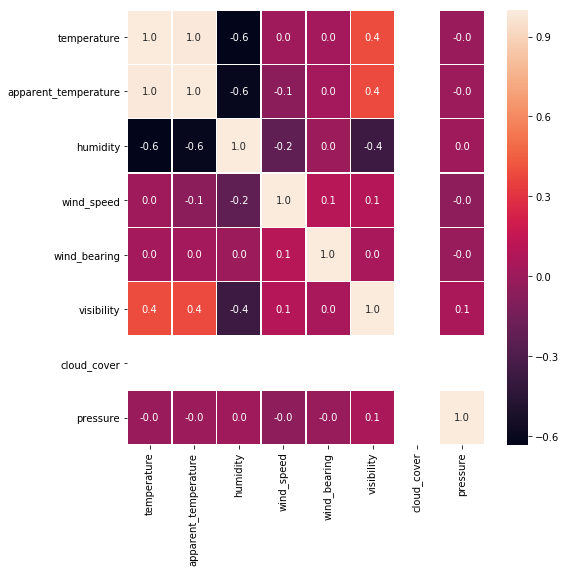

In [349]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Explanation

Feature showing maximum correlation with pressure is Visibility and none of the other features.

In [350]:
X_train, y_train = df[['pressure', 'visibility']], df[['temperature']]
X_test, y_test= df[['pressure', 'visibility']], df[['temperature']]

In [351]:
ls = linear_model.LinearRegression()
ls.fit(X_train, y_train)


print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)

print("\n\nCalculating Regression Quality Metrics")
print("\n")
y_pred = ls.predict(X_test)
print("1. R2 Value : ",r2_score(y_test,y_pred))
print ("2. MAE : ",metrics.mean_absolute_error(y_test, y_pred))
print ("3. MSE : ",metrics.mean_squared_error(y_test, y_pred))
print ("4. RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

alpha =  [-0.00237216  0.89883689]
beta =  [5.01190267]


Calculating Regression Quality Metrics


1. R2 Value :  0.15511794021705128
2. MAE :  7.094567232845781
3. MSE :  77.0792743628999
4. RMSE :  8.779480301413056


##### 5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [373]:
df.head()

,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-03-31 22:00:00,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-03-31 23:00:00,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 00:00:00,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 01:00:00,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 02:00:00,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [374]:
df = pd.get_dummies(df, columns=["precip_type"], prefix=["precip_type"])
df.head()

,recording_date_time,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure,precip_type_rain,precip_type_snow
0,2006-03-31 22:00:00,9.47,7.39,0.89,14.12,251,15.83,0,1015.13,1,0
1,2006-03-31 23:00:00,9.36,7.23,0.86,14.26,259,15.83,0,1015.63,1,0
2,2006-04-01 00:00:00,9.38,9.38,0.89,3.93,204,14.96,0,1015.94,1,0
3,2006-04-01 01:00:00,8.29,5.94,0.83,14.10,269,15.83,0,1016.41,1,0
4,2006-04-01 02:00:00,8.76,6.98,0.83,11.04,259,15.83,0,1016.51,1,0


In [375]:
X = df.drop(['recording_date_time', 'cloud_cover', 'temperature'], axis=1)
y = df['temperature']

In [379]:
X.head()

,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure,precip_type_rain,precip_type_snow
0,7.39,0.89,14.12,251,15.83,1015.13,1,0
1,7.23,0.86,14.26,259,15.83,1015.63,1,0
2,9.38,0.89,3.93,204,14.96,1015.94,1,0
3,5.94,0.83,14.10,269,15.83,1016.41,1,0
4,6.98,0.83,11.04,259,15.83,1016.51,1,0


##### (a) Train a linear regression model without considering overfitting scenario and report the test performance.

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [378]:
ls = linear_model.LinearRegression()
ls.fit(X_train, y_train)


print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)

print("\n\nCalculating Regression Quality Metrics")
print("\n")
y_pred = ls.predict(X_test)
print("1. R2 Value : ",r2_score(y_test,y_pred))
print ("2. MAE : ",metrics.mean_absolute_error(y_test, y_pred))
print ("3. MSE : ",metrics.mean_squared_error(y_test, y_pred))
print ("4. RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

alpha =  0.8731168014950064
beta =  2.803076373805043


Calculating Regression Quality Metrics


1. R2 Value :  0.9901539679321097
2. MAE :  0.7403360649352142
3. MSE :  0.9017278871696561
4. RMSE :  0.9495935378727344


In [317]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9901535859702555


mean_absolute_error : 0.7403915338807744


mean_squared_error :  0.9017628683329769


root_mean_squared_error :  0.9496119567133603


In [318]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9793774998408024


mean_absolute_error : 1.0589858916316326


mean_squared_error :  1.8886677768757087


root_mean_squared_error :  1.3742880982078354


In [321]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)

# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9899967710002165


mean_absolute_error : 0.7415415997055104


mean_squared_error :  0.9161244335436902


root_mean_squared_error :  0.9571438938548844


## Lasso

In [322]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.85223791 -1.15471233  0.04513243 -0.          0.         -0.        ]


In [323]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)


[ 0.66071541 -0.          0.          0.          0.         -0.        ]


In [324]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9210956652151557


mean_absolute_error : 2.076070236157457


mean_squared_error :  7.226285533448468


root_mean_squared_error :  2.688175130725018


In [325]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


alpha :  3.9360637636796387e-05


In [327]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.66071541 -0.          0.          0.          0.         -0.        ]


In [328]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9210956652151557


mean_absolute_error : 2.076070236157457


mean_squared_error :  7.226285533448468


root_mean_squared_error :  2.688175130725018


In [329]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


alpha :  3.9360637636796387e-05
R-Square Value 0.9901457981143899


mean_absolute_error : 0.7400977958930681


mean_squared_error :  0.9024761025340179


root_mean_squared_error :  0.9499874223030629


##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

Continuous variable temperature

Binary Variable / Vategorical Variable

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [220]:
df = pd.read_csv('weather_dataset.csv')
df.drop('recording_date_time', inplace=True, axis=1)

In [223]:
df["precip_type"] = df["precip_type"].astype('category')
df.dtypes

precip_type             category
temperature              float64
apparent_temperature     float64
humidity                 float64
wind_speed               float64
wind_bearing               int64
visibility               float64
cloud_cover                int64
pressure                 float64
dtype: object

In [224]:
df["precip_type"] = df["precip_type"].cat.codes
df.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,0,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,0,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,0,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,0,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,0,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [225]:
df.precip_type.value_counts()

0    85224
1    11229
Name: precip_type, dtype: int64

In [226]:
df.drop('cloud_cover', axis=1, inplace=True)

In [227]:
x = df.drop('precip_type', axis=1)
y = df['precip_type']

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [234]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
predictions = (logmodel.predict_proba(x_test)[:,1] >= 0.45).astype(int) 
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25551
           1       0.95      0.91      0.93      3385

   micro avg       0.98      0.98      0.98     28936
   macro avg       0.97      0.95      0.96     28936
weighted avg       0.98      0.98      0.98     28936

[[25401   150]
 [  297  3088]]
0.9845521150124412


In [246]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
predictions = (logmodel.predict_proba(x_test)[:,1] >= 0.45).astype(int) 
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


/Users/zeerakwyne/pythonVirtualEnvironments/deepLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25551
           1       0.93      0.94      0.94      3385

   micro avg       0.98      0.98      0.98     28936
   macro avg       0.96      0.97      0.96     28936
weighted avg       0.99      0.98      0.99     28936

[[25307   244]
 [  191  3194]]
0.9849668233342549


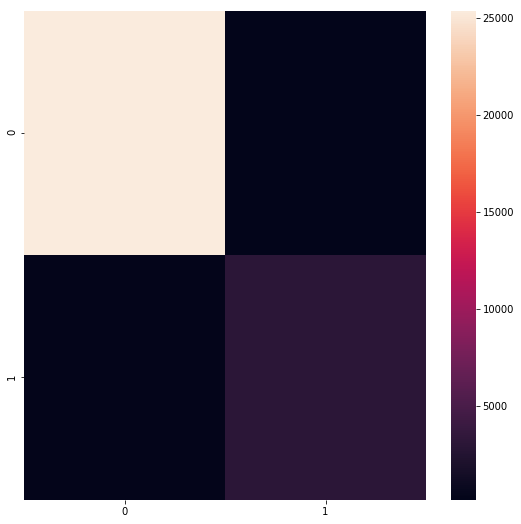

In [231]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [ ]:
# INSERT your code (or comment) here

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

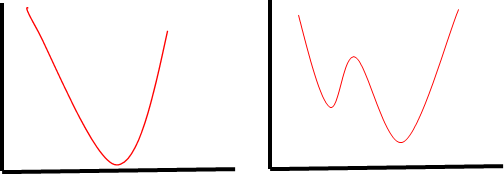





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)